#### Carregamento de dados

In [1]:
%run bot_libraries.ipynb

In [2]:
data = pd.read_csv("CryptoBot_202103006Mv001.csv")

In [3]:
%run tratamento_de_dados.ipynb

#### Gráfico 'Open', 'High', 'Low', 'Close'

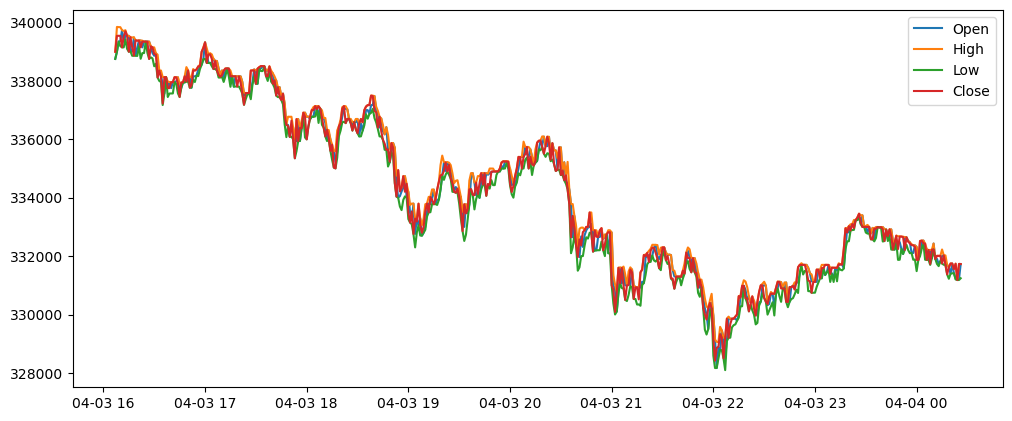

In [4]:
from matplotlib.pyplot import legend
from matplotlib import pylab
data_0 = data[['Open', 'High', 'Low', 'Close']]
plt.figure(figsize=(12,5), dpi=100)
line = plt.plot(data.index, data_0)
plt.legend(line, data_0.columns)

##### 5.1.6. MA - Moving average

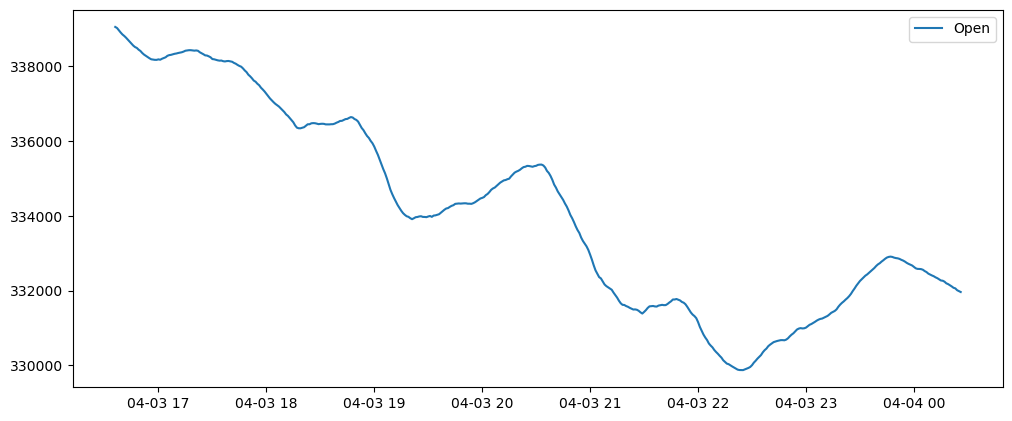

In [5]:
real = talib.MA(close, timeperiod=30, matype=0)
plt.figure(figsize=(12,5), dpi=100)
line = plt.plot(data.index, real)
plt.legend(line, data_0.columns)

In [6]:
real = talib.KAMA(close, timeperiod=30)

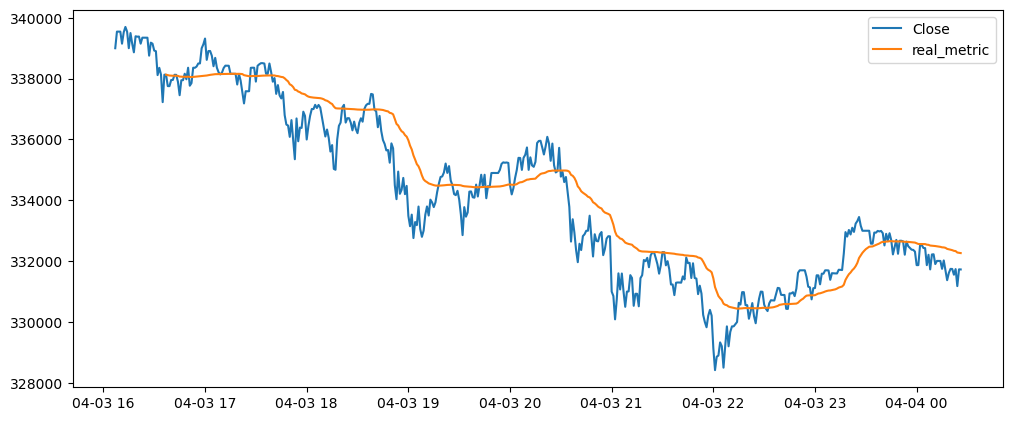

In [31]:
#Bordas de Boillinger
data_metric = pd.DataFrame({"real_metric": real})

data_0 = data_metric[["real_metric"]]
plt.figure(figsize=(12,5), dpi=100)



#Preço
data_p = pd.DataFrame()
data_p['Close'] = data['Close']
line_p = plt.plot(data_p.index, data_p)
# plt.legend(line_p, data_p.columns)


line = plt.plot(data_0.index, data_0)
plt.legend((*line_p, *line), (*data_p.columns, *data_0.columns))
plt.show()

#### Dataframe

In [11]:
data_metric = pd.DataFrame()
for i in range(len(data)):
    data_metric = data_metric.append({"Close": data['Close'][i], "real_metric": real[i]}, ignore_index = True)

In [12]:
data_metric_drop = data_metric.dropna().reset_index(drop = True)
data_metric_drop

,Close,real_metric
0,338128.0000000000,338129.9686547201
1,337755.0000000000,338116.1922747123
2,337754.0000000000,338102.8775234054
3,337955.0000000000,338098.3565791385
4,337958.0000000000,338095.1521548150
...,...,...
465,331555.0000000000,332339.8040745230
466,331740.0000000000,332332.4951821487
467,331181.0000000000,332284.7939806201
468,331732.0000000000,332275.0723874547


#### Loop de descisão de compra com a métrica escolhida